# Perceptron

The perceptron is a type of artificial neural network and one of the simplest forms of a neural network used for binary classification tasks. It is a supervised learning algorithm that learns a linear decision boundary to separate two classes. The perceptron algorithm was invented by Frank Rosenblatt in 1957 and is the foundation of more complex neural networks.

## How the Perceptron Works

The perceptron consists of input features, weights, a bias term, and an activation function. The input features are multiplied by their corresponding weights, and the bias term is added to the result. The sum is then passed through an activation function to produce the output.

### Mathematical Representation

The output of the perceptron can be represented mathematically as:

$$ y = \phi(\mathbf{w} \cdot \mathbf{x} + b) $$

Where:
- $\mathbf{x}$ is the input feature vector.
- $\mathbf{w}$ is the weight vector.
- $b$ is the bias term.
- $\phi$ is the activation function (usually the unit step function).

### Activation Function

The activation function used in a perceptron can be the sign function (1 or -1) or the unit step function, which outputs 1 if the input is greater than or equal to 0, and 0 otherwise:

$$ \phi(z) = \begin{cases} 
1 & \text{if } z \geq 0 \\
0 & \text{if } z < 0 
\end{cases} $$

In this demonstration, we will use the unit step function for the perceptron, which is more flexible.

### Training the Perceptron

The perceptron is trained using the perceptron learning rule, which updates the weights and bias based on the prediction error. The update rule is as follows:

$$ \mathbf{w} \leftarrow \mathbf{w} + \eta (y_{\text{true}} - y_{\text{pred}}) \mathbf{x} $$
$$ b \leftarrow b + \eta (y_{\text{true}} - y_{\text{pred}}) $$

Where:
- $ \eta $ is the learning rate.
- $ y_{\text{true}} $ is the true label.
- $ y_{\text{pred}} $ is the predicted label.

### Diagram of a Perceptron

Below is a diagram illustrating the structure of a perceptron:

![Perceptron Diagram](perceptron_diagram.png)

(From Medium.com)

We will define our perceptron as follows:

In [96]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

Now, we will train and test our Perceptron Model on some test data. For our dataset, we will use the seeds dataset which contains three species of seeds (Kama, Rosa, Canadian) and various measures features from seeds of each type.

In [97]:
import pandas as pd
from sklearn.impute import SimpleImputer

file_path = 'seeds_dataset.txt'  # Replace with your actual file name

# Define column names
column_names = [
    'area',  # Replace with actual feature names if available
    'perimeter',
    'compactness',
    'kernel length',
    'kernel width',
    'asymmetry coefficient',
    'kernel groove length',
    'Label'      # Last column as label
]

# Load the data
try:
    df = pd.read_csv(
        file_path,
        delim_whitespace=True,      # Handle any whitespace as delimiter
        header=None,                # No header in the file
        names=column_names,         # Assign column names
        na_values=['', ' ', 'NA', 'nan'],  # Treat these as NaN
        engine='python'             # Use Python engine for flexibility
    )
except Exception as e:
    print(f"Error reading the file: {e}")


# Handle missing values
# Remove rows with missing values
df_clean = df.dropna()

# Convert labels to categorical (optional)
df_clean['Label'] = df_clean['Label'].astype('category')

# Define label mapping
label_mapping = {
    1: 'Kama',
    2: 'Rosa',
    3: 'Canadian'
}

# Map numerical labels to categorical names
df_clean['Wheat_Variety'] = df_clean['Label'].map(label_mapping)

# Drop the original numerical label if desired
df_clean = df_clean.drop('Label', axis=1)

# Remove all rows where Wheat_Variety is 'Kama'
df_clean = df_clean[df_clean['Wheat_Variety'] != 'Kama']
print(df_clean.head())

     area  perimeter  compactness  kernel length  kernel width  \
70  17.63      15.98       0.8673          6.191         3.561   
71  16.84      15.67       0.8623          5.998         3.484   
72  17.26      15.73       0.8763          5.978         3.594   
73  19.11      16.26       0.9081          6.154         3.930   
74  16.82      15.51       0.8786          6.017         3.486   

    asymmetry coefficient  kernel groove length Wheat_Variety  
70                  4.076                 6.060          Rosa  
71                  4.675                 5.877          Rosa  
72                  4.539                 5.791          Rosa  
73                  2.936                 6.079          Rosa  
74                  4.004                 5.841          Rosa  


Now that our data is cleaned and inside a dataframe, we can visualize it. I removed all of the Kama variety of seeds so that we have only two sets — this is required for the most basic perceptron model. We will plot the Area vs. Compactness for each seed.

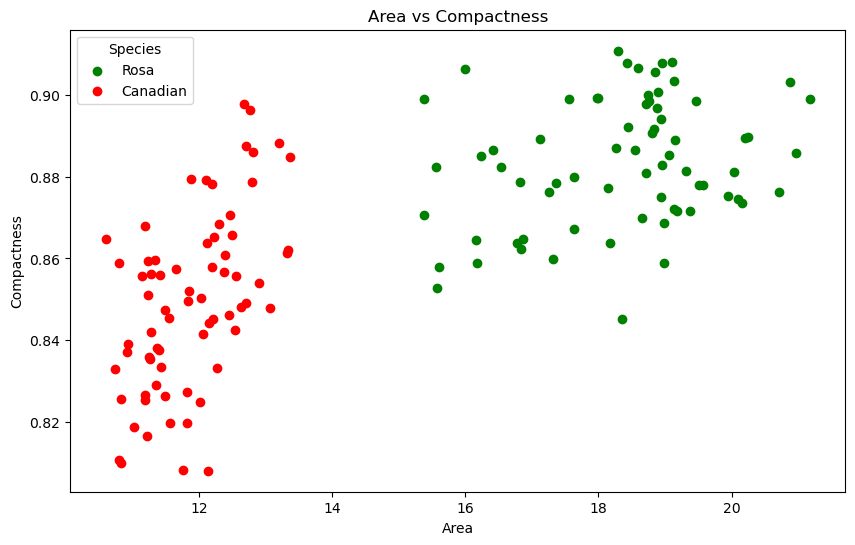

In [98]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
colors = {'Rosa': 'green', 'Canadian': 'red'}
for variety in ['Rosa', 'Canadian']:
    subset = df_clean[df_clean['Wheat_Variety'] == variety]
    plt.scatter(subset['area'], subset['compactness'], label=variety, color=colors[variety])

plt.title('Area vs Compactness')
plt.xlabel('Area')
plt.ylabel('Compactness')
plt.legend(title='Species')
plt.show()

A visualization of the data is shown above. Now, we will perform a train test split using our perceptron model.

Accuracy: 1.0


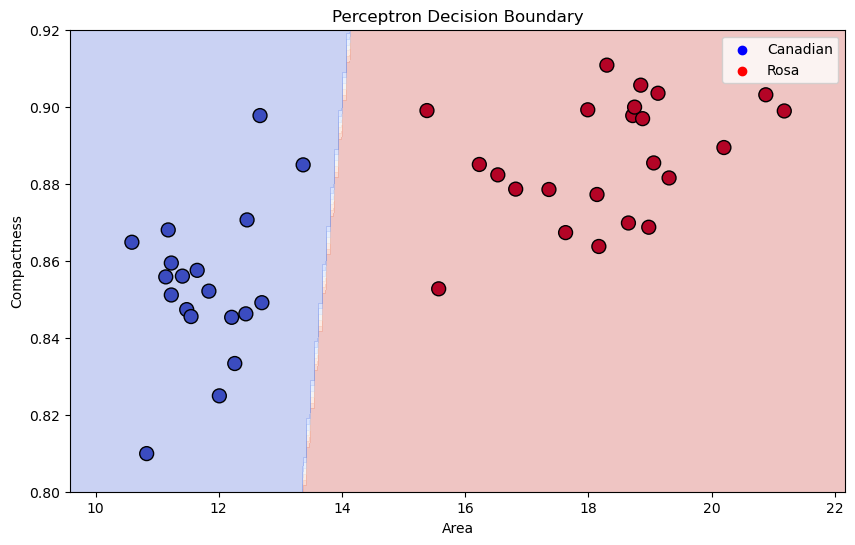

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

# Select the first two features and the target variable
X = df_clean[['area', 'compactness']].values
y = df_clean['Wheat_Variety'].apply(lambda x: 1 if x == 'Canadian' else 0).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = 0.8, 1.0  # Set the compactness axis from 0.8 to 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary with reversed colors
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm_r')

# Plot the true labels with reversed colors
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm_r', edgecolor='k', s=100)

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Compactness')
plt.title('Perceptron Decision Boundary')
plt.ylim(0.8, 0.92)  # Set the compactness axis from 0.8 to 1.0

# Add legend with reversed colors
canadian = plt.scatter([], [], color='blue', label='Canadian')
other = plt.scatter([], [], color='red', label='Rosa')
plt.legend(handles=[canadian, other])

plt.show()


Our model has has perfect accuracy. This is because our data is linearly seperable.

## Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It provides a detailed breakdown of the model's predictions compared to the actual labels. The matrix consists of four key components:

- **True Positives (TP)**: The number of instances correctly predicted as positive.
- **True Negatives (TN)**: The number of instances correctly predicted as negative.
- **False Positives (FP)**: The number of instances incorrectly predicted as positive (Type I error).
- **False Negatives (FN)**: The number of instances incorrectly predicted as negative (Type II error).

The confusion matrix is structured as follows:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| TP                 | FN                 |
| Actual Negative| FP                 | TN                 |

### Why Use a Confusion Matrix?

The confusion matrix is particularly useful for evaluating the results from the perceptron (or any classification model) because it provides a comprehensive view of the model's performance. 

These metrics help in understanding the strengths and weaknesses of the model, especially in cases where the classes are imbalanced. By analyzing the confusion matrix, we can identify specific areas where the model may be making errors and take steps to improve its performance.

Confusion Matrix:
[[23  0]
 [ 0 19]]
Shape of Confusion Matrix: (2, 2)


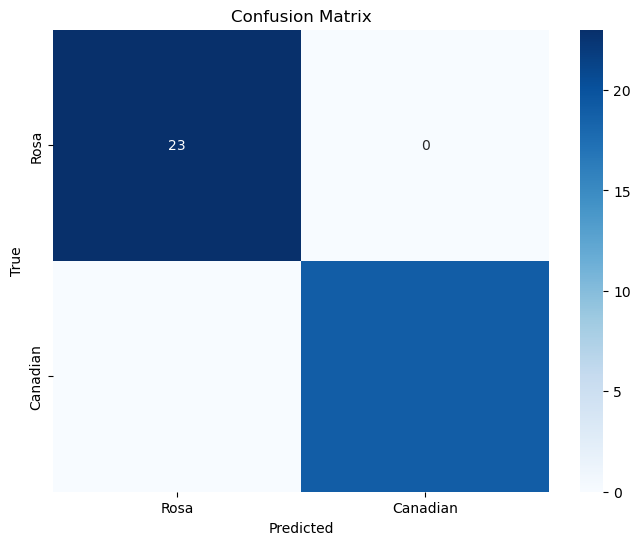

In [100]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Verify the shape of the confusion matrix
print("Shape of Confusion Matrix:", cm.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rosa', 'Canadian'], yticklabels=['Rosa', 'Canadian'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

As expected, our confusion matrix is perfect along the diagonal; no seeds were predicted incorrectly in the test set.

## Breast Cancer Dataset

Now, we will train and test our Perceptron Model on the Wisconsin Breast Cancer Dataset, which contains features of benign and malignant tumors. We will only consider the first two features: Mean Radius and Mean Texture.

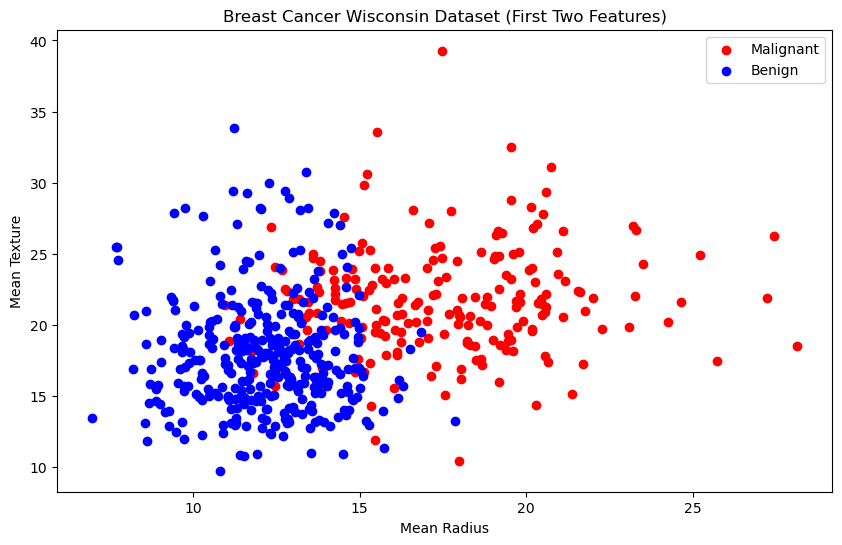

In [101]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :2]  # Select the first two features
y = breast_cancer.target

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Malignant')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Benign')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Wisconsin Dataset (First Two Features)')
plt.legend()
plt.show()

A visualization of the data is shown above. Now, we will perform a train test split using our perceptron model.

Accuracy: 0.9122807017543859


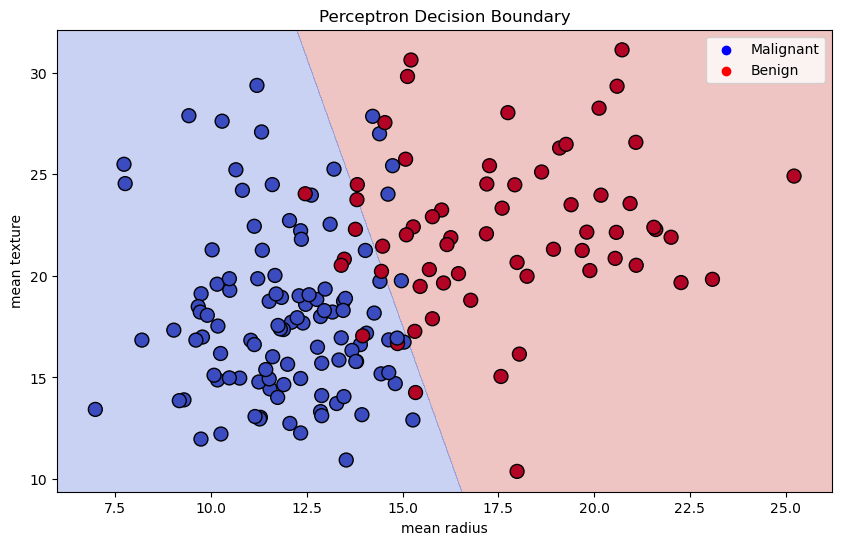

In [102]:
import seaborn as sns

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :2]  # Select the first two features
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary with reversed colors
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm_r')

# Plot the true labels with reversed colors
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm_r', edgecolor='k', s=100)

# Add labels and title
plt.xlabel(breast_cancer.feature_names[0])
plt.ylabel(breast_cancer.feature_names[1])
plt.title('Perceptron Decision Boundary')

# Add legend with reversed colors
malignant = plt.scatter([], [], color='blue', label='Malignant')
benign = plt.scatter([], [], color='red', label='Benign')
plt.legend(handles=[malignant, benign])

plt.show()

Our model has pretty good accuracy ($\approx 90\%$). Next, we will generate a confusion matrix:

Confusion Matrix:
[[ 53  10]
 [  5 103]]
Shape of Confusion Matrix: (2, 2)


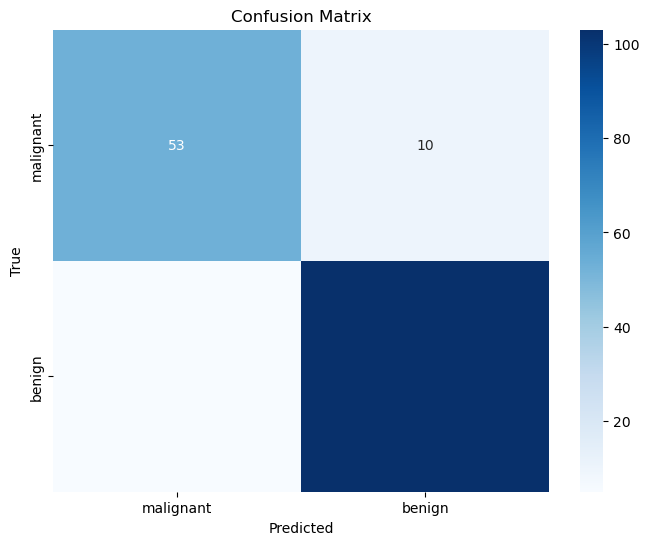

In [103]:
# Assuming y_test and y_pred are defined
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Verify the shape of the confusion matrix
print("Shape of Confusion Matrix:", cm.shape)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## A Limitation: False Negatives

In the context of diagnosing cancer, the consequences of false negatives and false positives are significantly different. A patient who is falsely diagnosed with cancer loses a lot less than a patient who is incorrectly undiagnosed with cancer. 

### Trade-Offs and Model Evaluation

When evaluating a diagnostic model, it is essential to consider the trade-offs between false positives and false negatives. Metrics such as sensitivity (recall) and specificity can help in understanding these trade-offs:

- **Sensitivity (Recall)**: The proportion of actual positives correctly identified by the model. High sensitivity means fewer false negatives.
- **Specificity**: The proportion of actual negatives correctly identified by the model. High specificity means fewer false positives.

In cancer diagnosis, a model with high sensitivity is often preferred, even if it comes at the cost of lower specificity. This ensures that most cancer cases are detected, even if it means some healthy individuals undergo additional testing.


Confusion Matrix:
[[62  1]
 [33 75]]
Accuracy: 0.8011695906432749
Precision: 0.9868421052631579
Recall: 0.6944444444444444


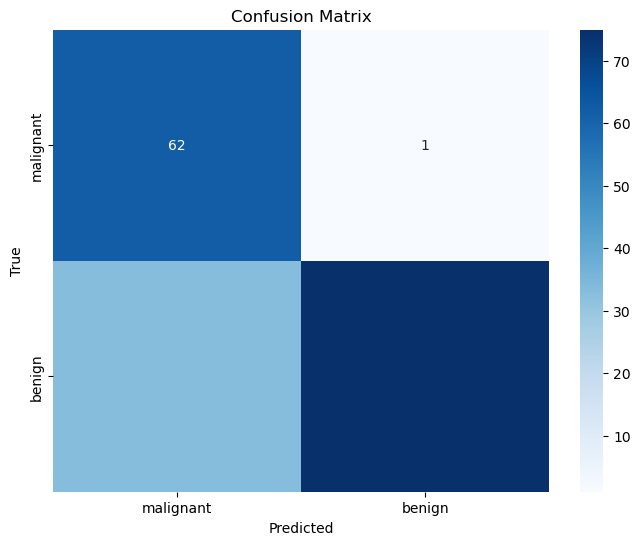

In [104]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Assuming X_train, y_train, X_test, y_test are defined
# Train the Perceptron model
model = Perceptron()
model.fit(X_train, y_train)

# Predict probabilities (decision function)
y_scores = model.decision_function(X_test)

# Set a lower threshold
threshold = -0.5  # Adjust this value as needed
y_pred_new_threshold = (y_scores > threshold).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_new_threshold)
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)

print("Confusion Matrix:")
print(cm)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Results

By 'shifting the perceptron line', we achieve only 1 false positive in the test set! That's 1/10th of what we had before. Great!